In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from fastai2.vision.all import *
from efficientnet_pytorch import EfficientNet

In [6]:
exp_time = str(datetime.now().replace(second=0, microsecond=0)).replace(" ", "_")
SIZE = 512
BS = 8
GPU = 0
EXP_NAME = "{}-{}-{}".format(BS, SIZE, exp_time)
print(EXP_NAME)

8-512-2020-04-06_17:43:00


In [7]:
CSV_PATH = "/home/ubuntu/auto/dataset/train.csv"
df = pd.read_csv(CSV_PATH)

In [8]:
item_tfms = [Resize(SIZE)]

In [9]:
dls = ImageDataLoaders.from_df(df=df, path="/home/ubuntu/auto/dataset/train", 
                                item_tfms=item_tfms, valid_pct=0.0,
                                bs=BS, num_workers=16, device=GPU)

Could not do one pass in your dataloader, there is something wrong in it


In [15]:
class_id = []
for x,y in  dls.train_ds:
    class_id.append(int(y))
    

In [17]:
from collections import Counter

In [18]:
Counter(class_id)

Counter({0: 1691, 2: 2278, 3: 1271, 1: 743})

In [25]:
_x = []
_y = []
for x,y in dls.train_ds:
    _x.append(x.size[0])
    _y.append(x.size[1])

In [26]:
import matplotlib.pyplot as plt

In [29]:
np.unique(_x)

array([80])

In [30]:
np.unique(_y)

array([ 20,  22,  24,  27,  28,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 146, 147, 148, 149, 151, 152, 154, 155, 156, 160,
       161, 163, 166, 167, 168, 172, 174, 176, 178, 181, 183, 184, 186,
       187, 191, 196, 199, 210, 211, 235])

(array([4.000e+00, 5.000e+00, 1.200e+01, 3.400e+01, 1.700e+02, 1.690e+02,
        1.538e+03, 1.577e+03, 1.380e+02, 6.600e+01, 7.500e+01, 6.490e+02,
        4.000e+01, 5.200e+01, 5.100e+01, 6.400e+01, 5.790e+02, 7.000e+01,
        5.480e+02, 3.500e+01, 2.100e+01, 1.500e+01, 3.300e+01, 7.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 20.   ,  25.375,  30.75 ,  36.125,  41.5  ,  46.875,  52.25 ,
         57.625,  63.   ,  68.375,  73.75 ,  79.125,  84.5  ,  89.875,
         95.25 , 100.625, 106.   , 111.375, 116.75 , 122.125, 127.5  ,
        132.875, 138.25 , 143.625, 149.   , 154.375, 159.75 , 165.125,
        170.5  , 175.875, 181.25 , 186.625, 192.   , 197.375, 202.75 ,
        208.125, 213.5  , 218.875, 224.25 , 229.625, 235.   ]),
 <a list of 40 Patch objects>)

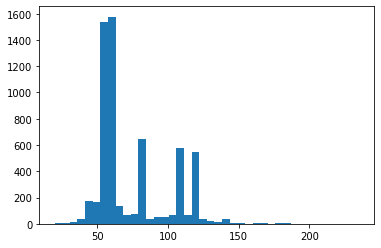

In [38]:
plt.hist(_y, bins=40)